# Introduction to timeseries plots in Python



In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from datetime import date
from nsepy import get_history
import altair as alt

In [35]:
# NIFTY 50 index
nifty_50 = get_history(symbol="NIFTY 50",
                            start=date(2001,1,1),
                            end=date(2020,5,3),
                            index=True)

# NIFTY Next 50 index
nifty_next50 = get_history(symbol="NIFTY NEXT 50",
                            start=date(2001,1,1),
                            end=date(2020,5,3),
                            index=True)

# # India VIX index
# india_vix = get_history(symbol="INDIAVIX",
#                             start=date(2001,1,1),
#                             end=date(2020,5,3),
#                             index=True)

In [36]:
nifty_50.shape, nifty_next50.shape

((4806, 6), (4806, 6))

In [37]:
MKT = nifty_next50.join(nifty_50['Close'], how='outer', rsuffix='_N50').dropna()

In [38]:
data = MKT.rename(columns={'Close':'NN50','Close_N50':'N50'})\
            .assign(NN50_returns=lambda x: np.log(x['NN50']/x['NN50'].shift(1)))\
            .assign(N50_returns=lambda x: np.log(x['N50']/x['N50'].shift(1)))

In [39]:
data = data[['NN50', 'N50', 'NN50_returns', 'N50_returns']].dropna()

In [40]:
data.index = pd.DatetimeIndex(data.index)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1161b4310>,
      dtype=object)

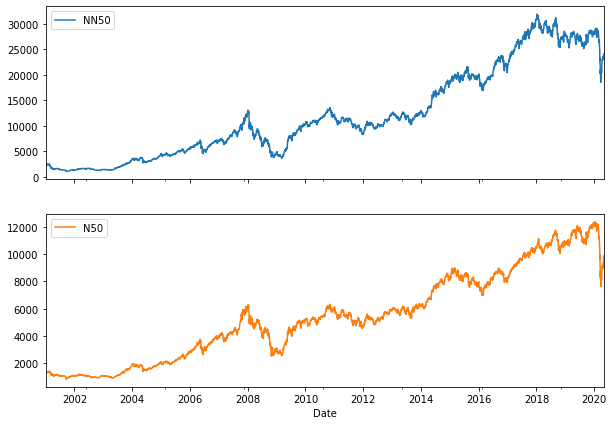

In [41]:
# Let's plot SPX and VIX cumulative returns with recession overlay
plot_cols = ['NN50', 'N50']

# 2 axes for 2 subplots

fig, axes = plt.subplots(2,1, figsize=(10,7), sharex=True)
data[plot_cols].plot(subplots=True, ax=axes)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ab58350>,
      dtype=object)

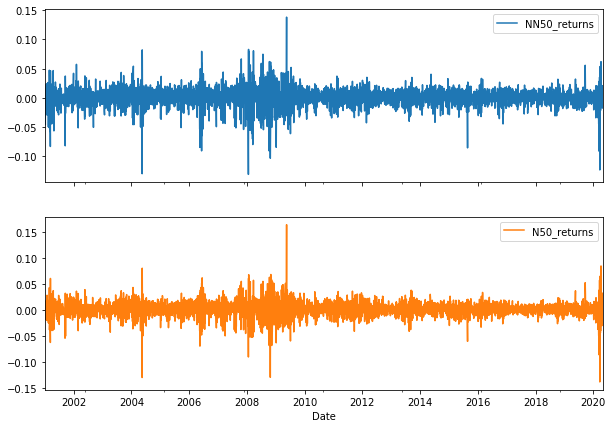

In [42]:
# Let's plot SPX and VIX cumulative returns with recession overlay
plot_cols = ['NN50_returns', 'N50_returns']

# 2 axes for 2 subplots

fig, axes = plt.subplots(2,1, figsize=(10,7), sharex=True)
data[plot_cols].plot(subplots=True, ax=axes)

In [43]:
# ================================================================== #
# resample log returns weekly starting monday
lrets_resampled = data[['NN50_returns', 'N50_returns']].resample('W-MON').sum()

# ================================================================== #
# rolling mean returns
n = 52
roll_mean = lrets_resampled.rolling(window=n, min_periods=n ).mean().dropna(axis=0,how='all')

# ================================================================== #
# rolling sigmas
roll_sigs = lrets_resampled.rolling(window=n, min_periods=n ).std().dropna(axis=0,how='all') * math.sqrt(n)

# ================================================================== #
# rolling risk adjusted returns 
roll_risk_rets = roll_mean/roll_sigs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a612e90>,
      dtype=object)

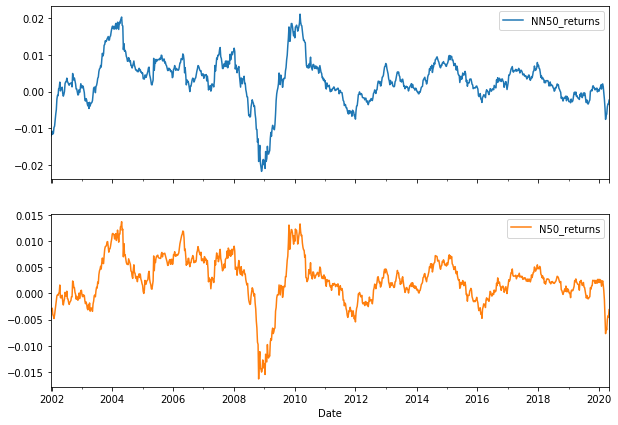

In [44]:
# Let's plot SPX and VIX cumulative returns with recession overlay
plot_cols = ['NN50_returns', 'N50_returns']

# 2 axes for 2 subplots

fig, axes = plt.subplots(2,1, figsize=(10,7), sharex=True)
roll_mean[plot_cols].plot(subplots=True, ax=axes)

In [58]:
NN50 = alt.Chart(data.reset_index()).transform_fold(
    ['NN50'],
    as_=['symbol', 'price']
).mark_line().encode(
    x='Date:T',
    y='price:Q'
).properties(width=600, height=200)

N50 = alt.Chart(data.reset_index()).transform_fold(
    ['N50'],
    as_=['symbol', 'price']
).mark_line().encode(
    x='Date:T',
    y='price:Q'
).properties(width=600, height=200)

alt.vconcat(NN50, N50)

alt.VConcatChart(...)

In [45]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2020-05-17T23:00:15+05:30

CPython 3.7.4
IPython 7.9.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.4.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
